In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import tqdm
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('../data/with_features.csv')
df.dropna(inplace=True)
df.head()

,time,longitude,latitude,depth,mag,magType,time_disc,longitude_disc,latitude_disc,pos,lat_cent,lon_cent,plate_region,dist_region,dist,plate,label
0,1973-01-01 01:05:56.150,-117.588000,34.189833,6.000,1.70,5,1973-01-01,-118,34,34_-118,34.5,-117.5,1,16.691592,19.302507,1,0
1,1973-01-01 04:46:09.800,150.634000,-9.214000,41.000,5.30,3,1973-01-01,150,-10,-10_150,-9.5,150.5,51,21.124956,55.729840,61,0
2,1973-01-01 05:20:59.780,-122.117333,48.308667,13.680,2.20,2,1973-01-01,-123,48,48_-123,48.5,-122.5,3,296.114618,314.738391,3,0
3,1973-01-01 06:22:29.800,-173.958000,-15.012000,33.000,5.00,3,1973-01-01,-174,-16,-16_-174,-15.5,-173.5,34,84.317941,18.239739,42,0
4,1973-01-01 08:58:11.460,-155.360833,19.443667,7.302,1.85,1,1973-01-01,-156,19,19_-156,19.5,-155.5,2,3527.668174,3522.498687,2,0


In [10]:
SPLIT_DATE_TRAIN = "2020-01-01"

In [11]:
def filter_regions(df: pd.DataFrame, threshold: int) -> pd.DataFrame:
    df_f = df[df["time"] <= SPLIT_DATE_TRAIN]
    df_agg = df_f.groupby(["pos"]).agg({"mag": "count"}).reset_index()
    regions = df_agg.loc[df_agg["mag"] >= threshold, "pos"].values
    return regions

In [12]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

In [13]:
df = df[df["time"] <= SPLIT_DATE_TRAIN]

In [16]:
Rs = [100, 200, 300, 400, 500, 600, 700, 800, 900]

In [18]:
regions = filter_regions(df, 150)
counts = []
for radius in Rs:
    count = []
    for pos in tqdm.tqdm(regions):
        lat, lon = pos.split("_")
        lat, lon = float(lat), float(lon)
        diff = radius // 111 + 3
        tmp = df[((df["latitude"] >= lat - diff) & (df["latitude"] <= lat + diff) & (df["longitude"] >= lon - diff) & (df["longitude"] <= lon + diff))]
        tmp["distance"] = haversine_distance(tmp["latitude"], tmp["longitude"], lat + 0.5, lon + 0.5)
        tmp = tmp[tmp["distance"] <= radius]
        count.append(len(tmp))
    counts.append(count)

100%|██████████| 1362/1362 [02:33<00:00,  8.89it/s]


In [28]:
for i in range(len(Rs)):
    # sort by count
    counts[i] = np.sort(counts[i])

In [30]:
counts[0]

array([   188,    208,    212, ..., 312479, 324472, 330977])

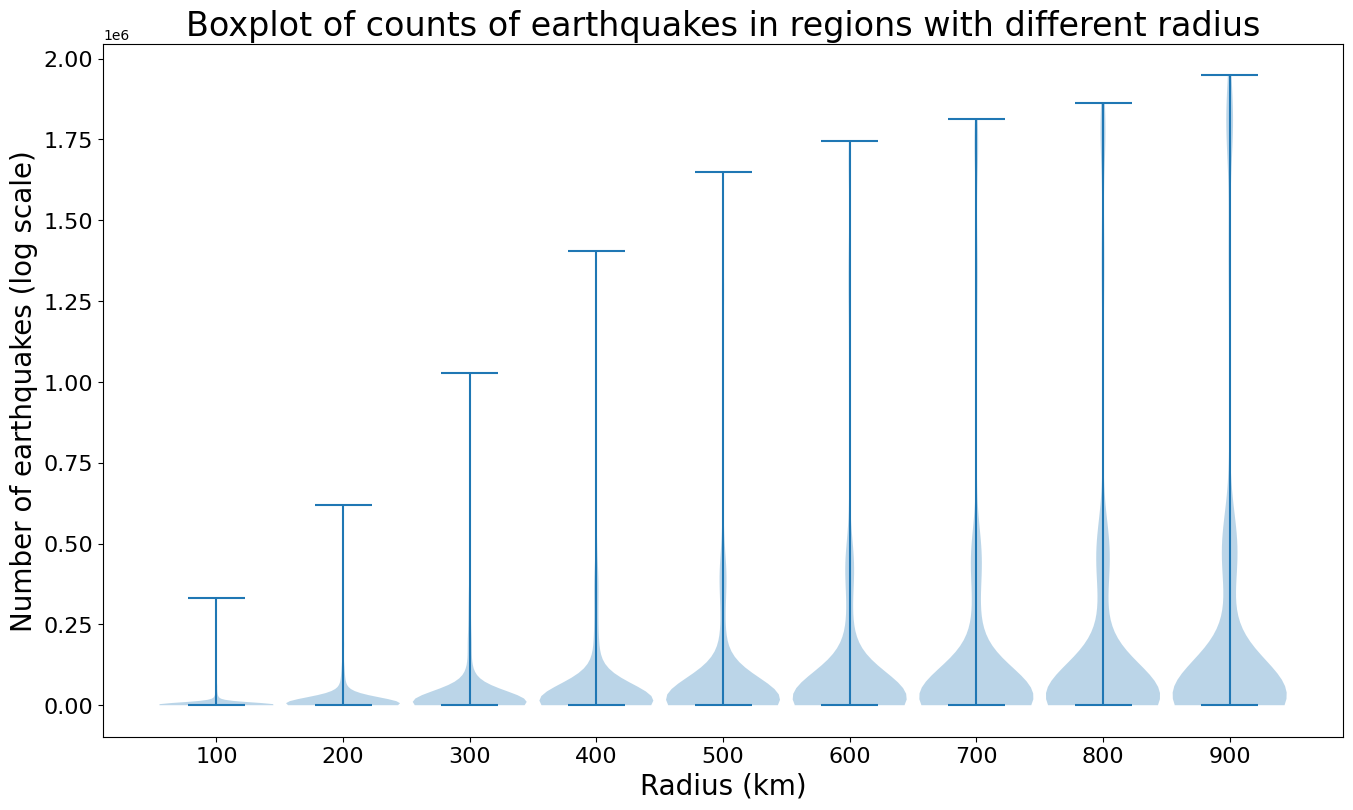

In [52]:
plt.figure(figsize=(16, 9))
plt.violinplot(counts, widths=0.9)
plt.xticks(np.arange(1, len(Rs) + 1), Rs, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Radius (km)", fontsize=20)
plt.ylabel("Number of earthquakes (log scale)", fontsize=20)
plt.title("Boxplot of counts of earthquakes in regions with different radius", fontsize=24)
#plt.yscale("log")
plt.show()

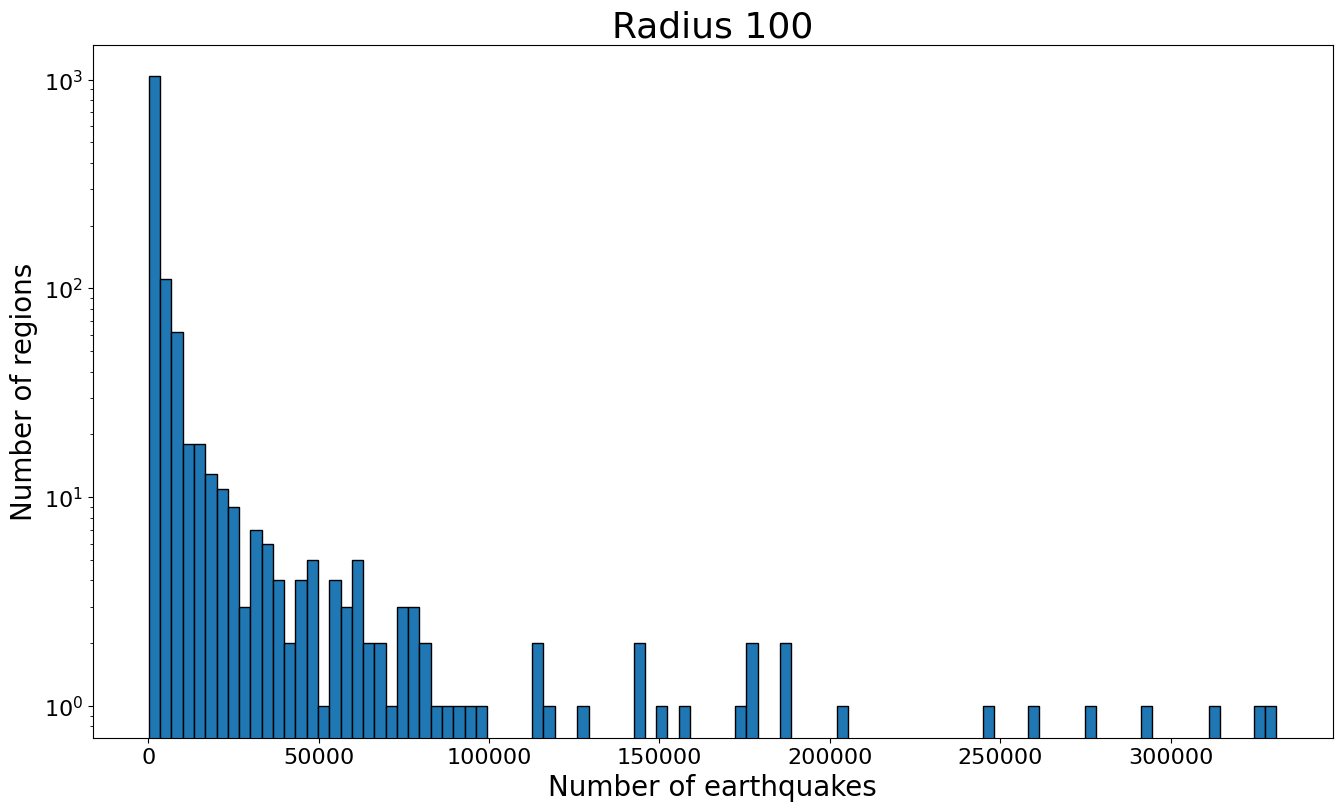

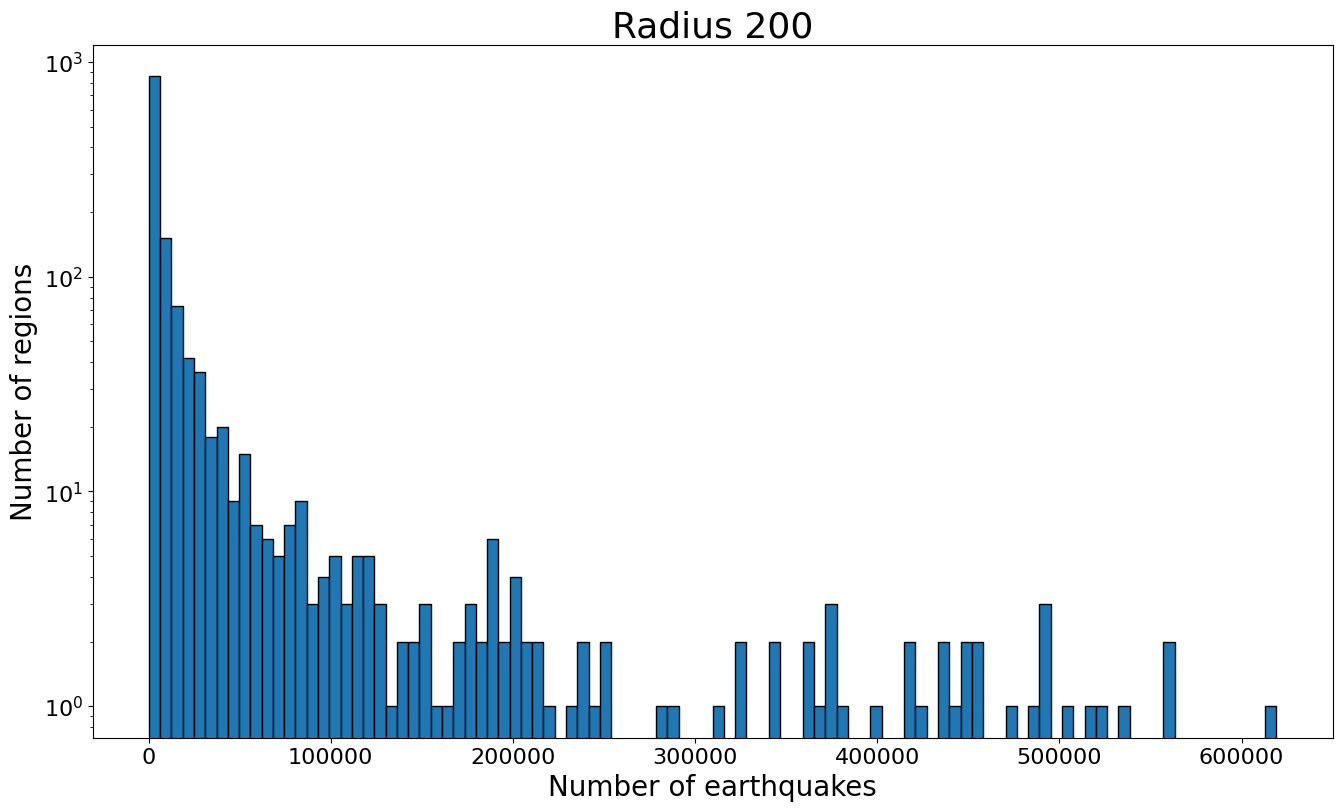

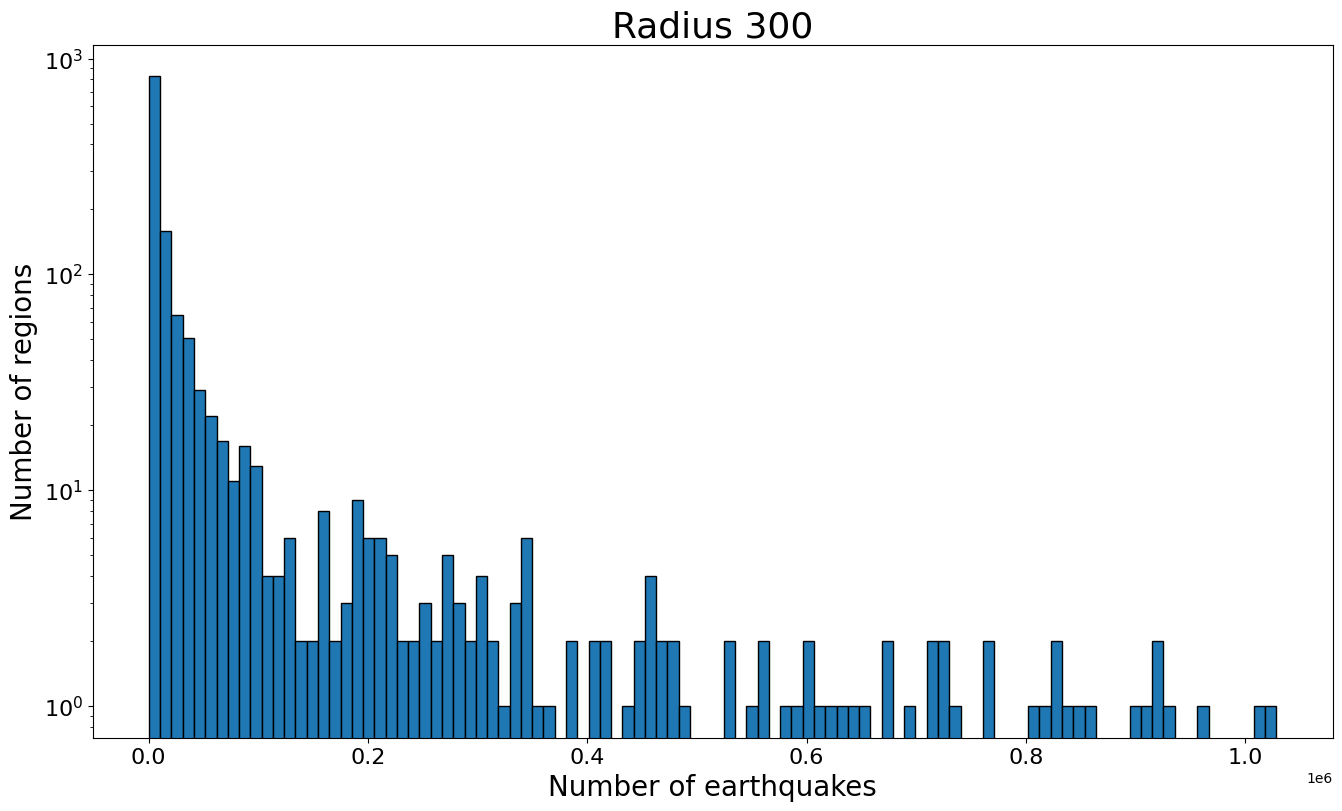

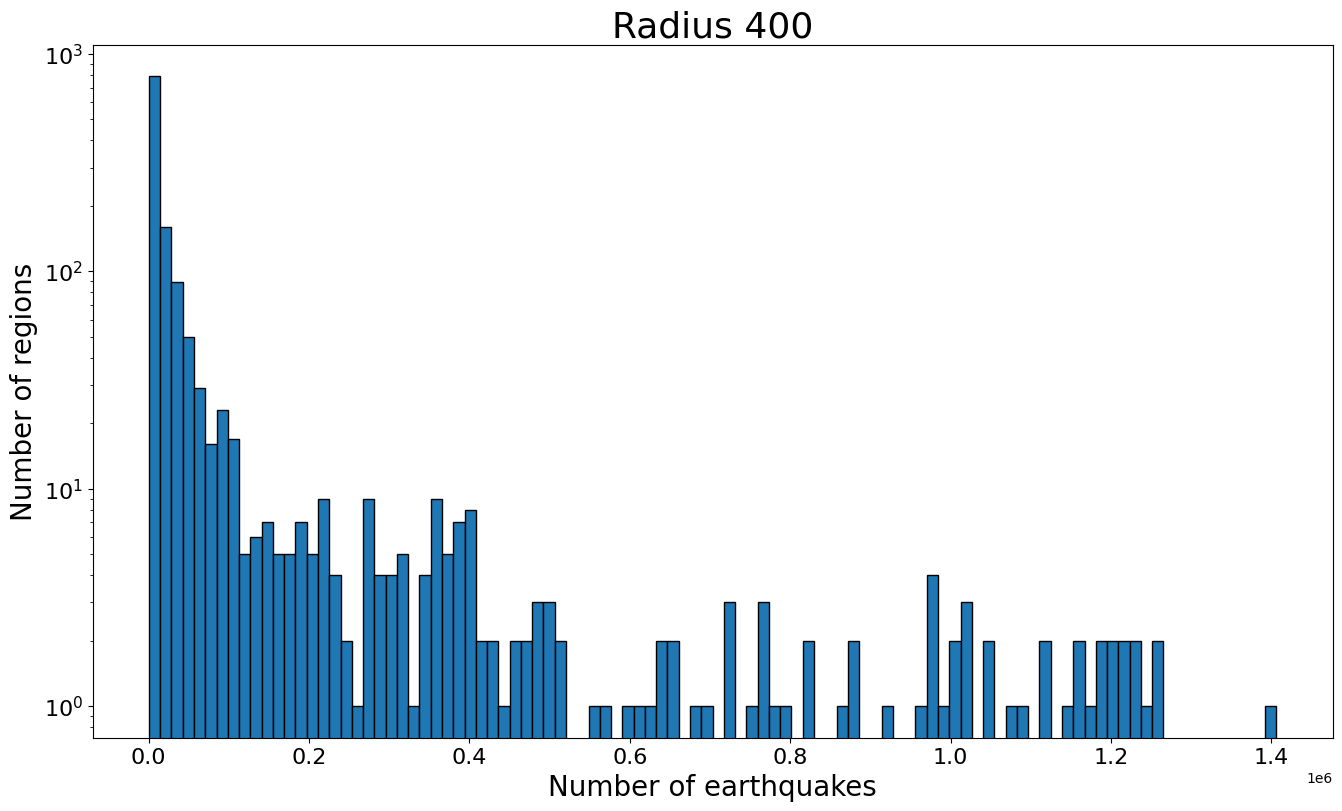

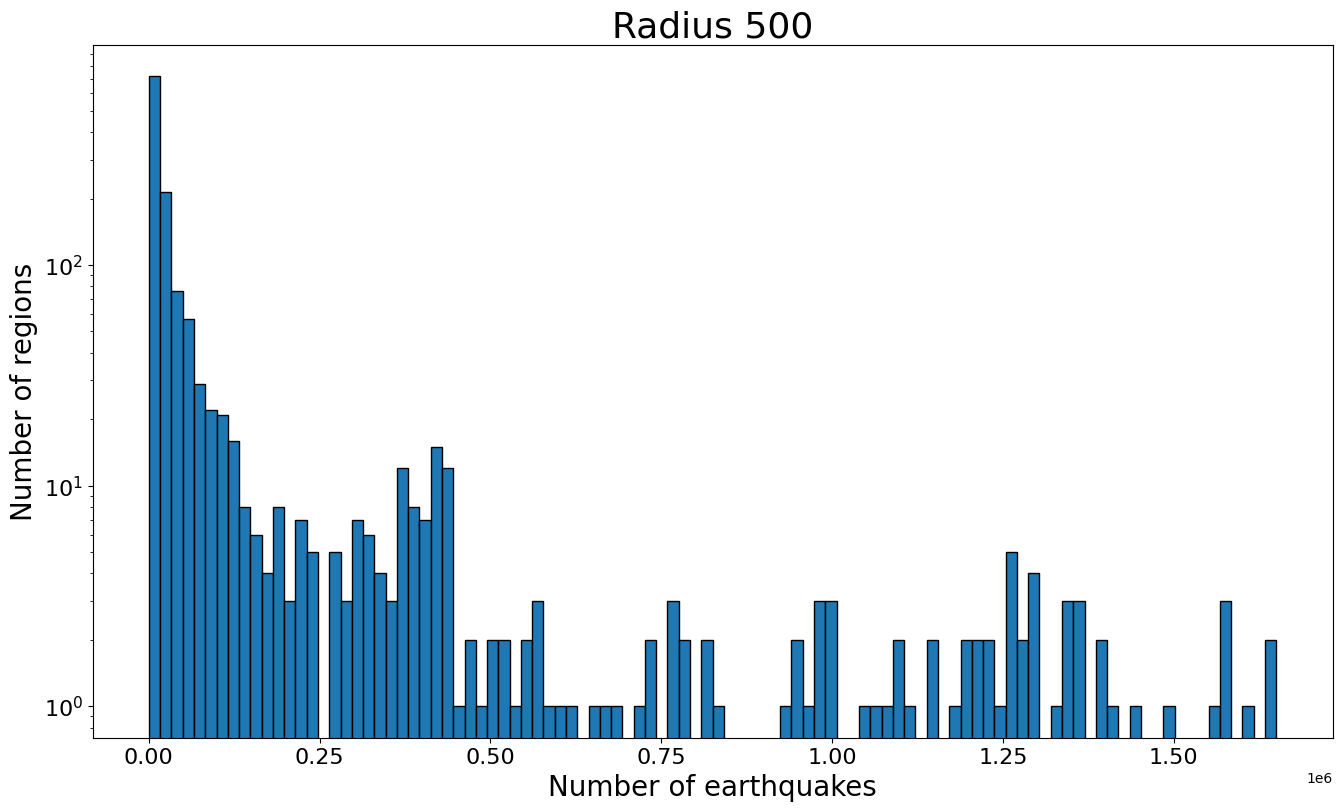

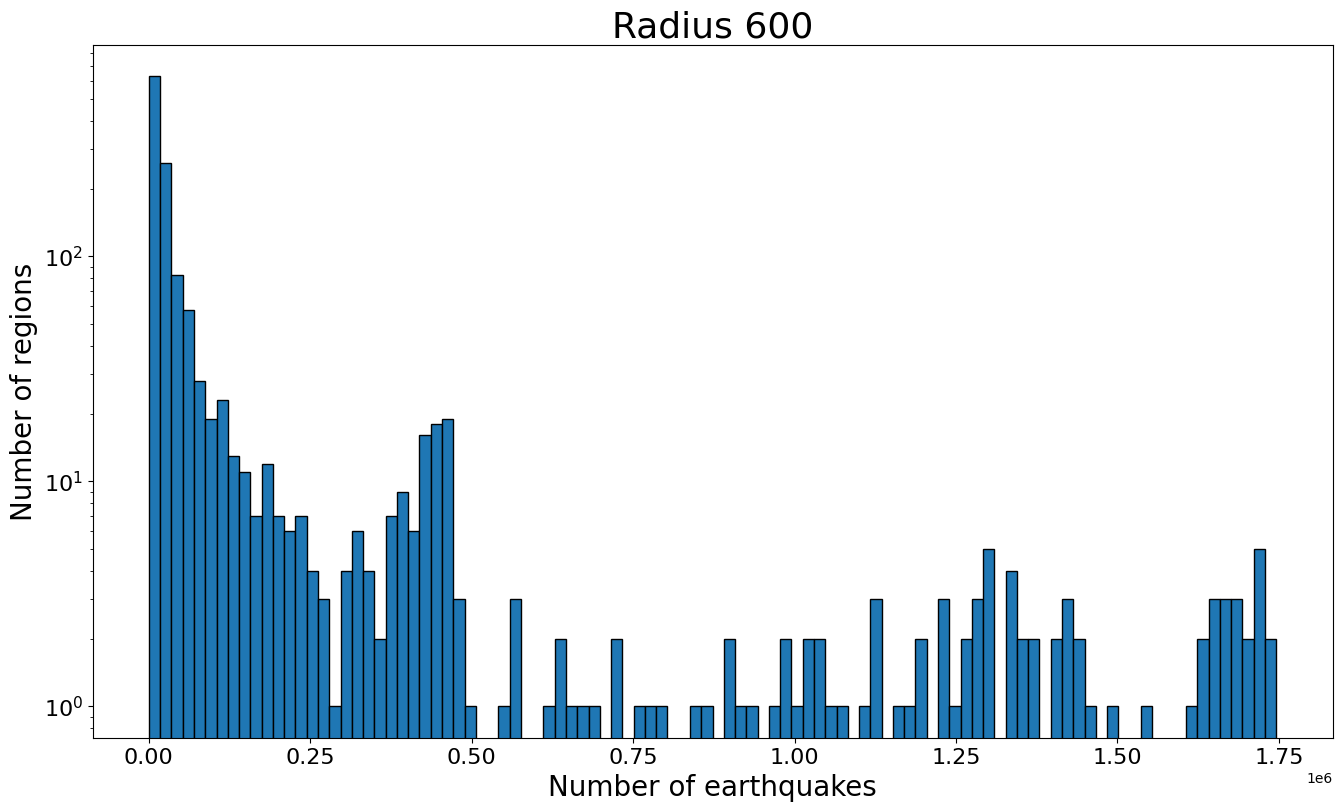

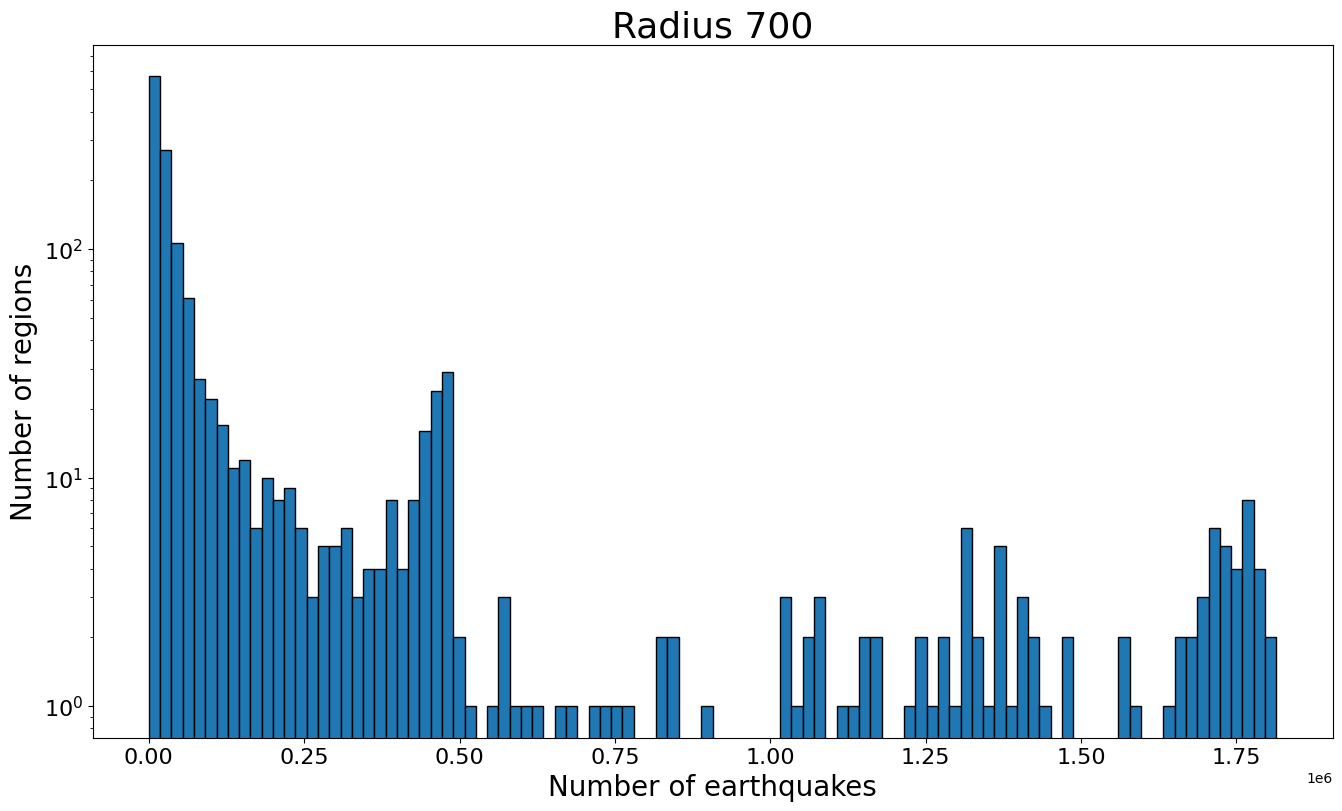

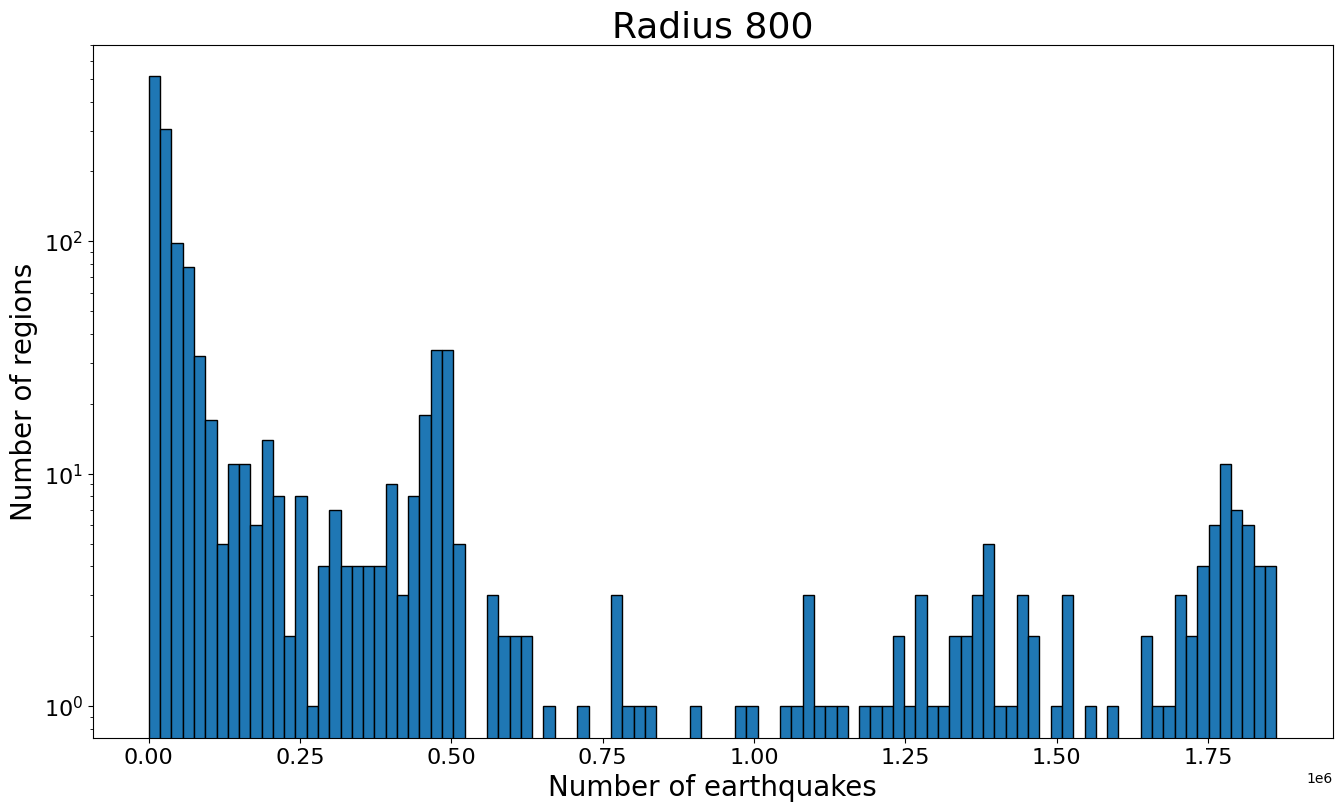

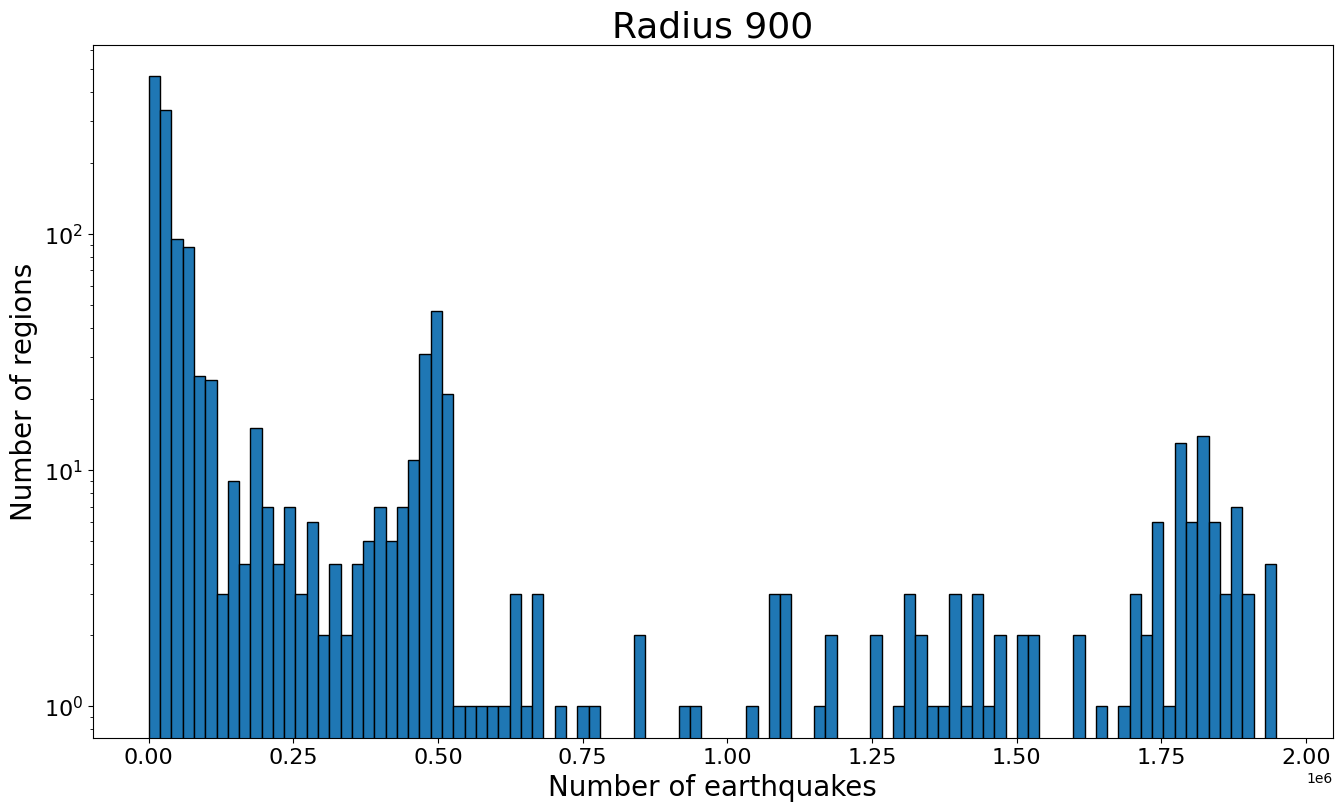

In [23]:
for i in range(len(Rs)):
    plt.figure(figsize=(16, 9))
    plt.hist(counts[i], bins=100, edgecolor="black")
    plt.title(f"Radius {Rs[i]}", fontsize=26)
    plt.xlabel("Number of earthquakes", fontsize=20)
    plt.ylabel("Number of regions (log scale)", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.yscale("log")
    plt.show()

In [21]:
n = 100

In [22]:
counts1 = []
counts2 = []
for th in np.linspace(0, n, n // 5 + 1):
    df_filter = filter_regions(df.copy(deep=True), th)
    counts1.append(df_filter["pos"].nunique())
    counts2.append(len(df_filter))

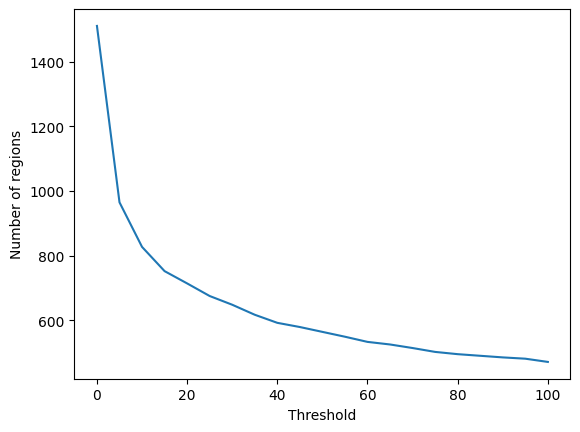

In [23]:
# plot counts
plt.plot(np.linspace(0, n, n // 5 + 1), counts1)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

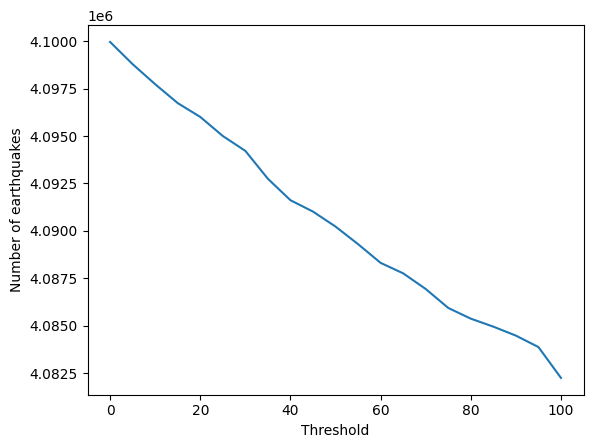

In [24]:
plt.plot(np.linspace(0, n, n // 5 + 1), counts2)
plt.xlabel("Threshold")
plt.ylabel("Number of earthquakes")
plt.show()

In [25]:
n = 750

In [26]:
counts3 = []
counts4 = []
for th in np.linspace(0, n, n // 20 + 1):
    df_filter = filter_regions(df.copy(deep=True), th)
    counts3.append(df_filter["pos"].nunique())
    counts4.append(len(df_filter))

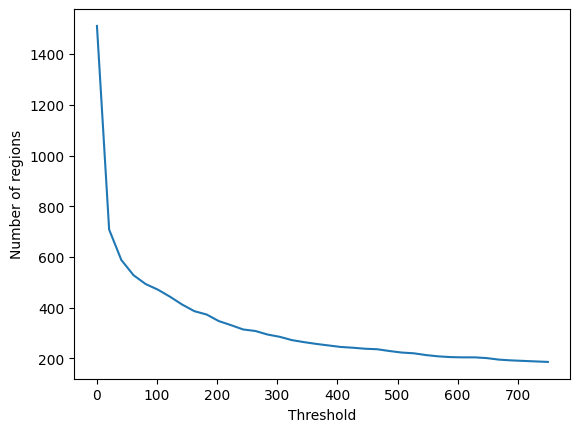

In [27]:
# plot counts
plt.plot(np.linspace(0, n, n // 20 + 1), counts3)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

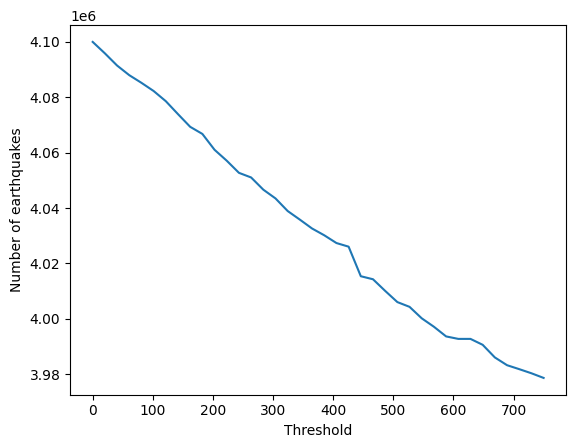

In [28]:
plt.plot(np.linspace(0, n, n // 20 + 1), counts4)
plt.xlabel("Threshold")
plt.ylabel("Number of earthquakes")
plt.show()

In [29]:
n = 3000

In [30]:
counts5 = []
counts6 = []
for th in np.linspace(0, n, n // 100 + 1):
    df_filter = filter_regions(df.copy(deep=True), th)
    counts5.append(df_filter["pos"].nunique())
    counts6.append(len(df_filter))

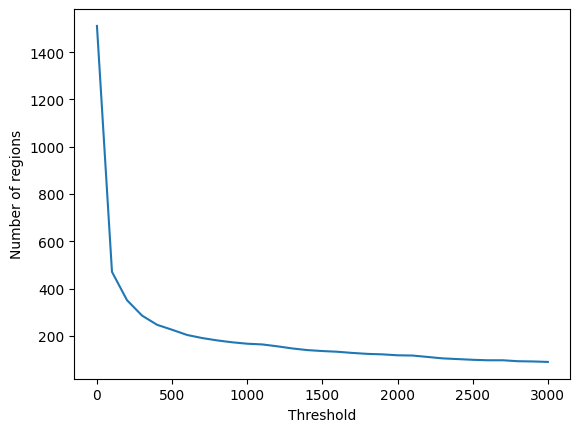

In [31]:
# plot counts
plt.plot(np.linspace(0, n, n // 100 + 1), counts5)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

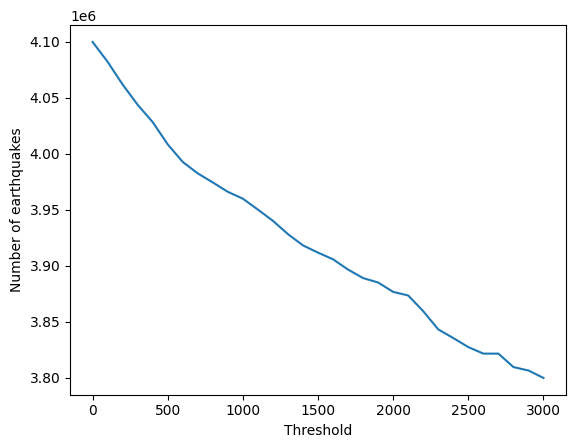

In [32]:
plt.plot(np.linspace(0, n, n // 100 + 1), counts6)
plt.xlabel("Threshold")
plt.ylabel("Number of earthquakes")
plt.show()